In [1]:
import random
import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
!pip install kaggle

In [4]:
# prompt: kaggle.json config

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.04G/2.04G [01:34<00:00, 24.4MB/s]
100% 2.04G/2.04G [01:34<00:00, 23.3MB/s]


In [6]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [7]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [8]:
print(len(os.listdir('plantvillage dataset/color'))) #38 classes
print(os.listdir('plantvillage dataset/color'))

38
['Tomato___Early_blight', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Peach___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 'Blueberry___healthy', 'Tomato___Target_Spot', 'Peach___healthy', 'Tomato___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Soybean___healthy', 'Tomato___Bacterial_spot', 'Strawberry___Leaf_scorch', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Late_blight', 'Corn_(maize)___Northern_Leaf_Blight', 'Apple___Black_rot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___healthy', 'Potato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Corn_(maize)___Common_rust_', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Early_blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Apple_scab', 'Raspberry___healthy', 'Grape___Black_rot', 'Cherry_(including_sour)___healthy', 'Gr

(256, 256, 3)


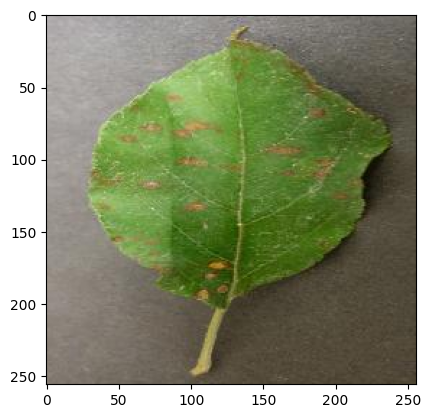

In [9]:
# prompt: display image '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG

import matplotlib.pyplot as plt
img = mpimg.imread('/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG')
plt.imshow(img)

print(img.shape)

In [10]:
# Parameters
base_dir = '/content/plantvillage dataset/color'
img_size = 224
batch_size = 32

In [11]:
# prompt: Train test split

# Split the data into training and validation sets
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [12]:
# prompt: Build CNN

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dense(38, activation='softmax')
])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [14]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 [==============================] - 114s 80ms/step - loss: 0.8477 - accuracy: 0.7534 - val_loss: 0.3798 - val_accuracy: 0.8791
Epoch 2/5
1358/1358 [==============================] - 111s 82ms/step - loss: 0.2681 - accuracy: 0.9147 - val_loss: 0.2790 - val_accuracy: 0.9132
Epoch 3/5
1358/1358 [==============================] - 108s 79ms/step - loss: 0.1422 - accuracy: 0.9532 - val_loss: 0.3601 - val_accuracy: 0.9041
Epoch 4/5
1358/1358 [==============================] - 107s 79ms/step - loss: 0.0973 - accuracy: 0.9677 - val_loss: 0.4179 - val_accuracy: 0.8939
Epoch 5/5
1358/1358 [==============================] - 110s 81ms/step - loss: 0.0770 - accuracy: 0.9754 - val_loss: 0.5365 - val_accuracy: 0.8742


339/339 [==============================] - 19s 55ms/step - loss: 0.5365 - accuracy: 0.8742
Test loss: 0.5364995002746582
Test accuracy: 0.8741703629493713


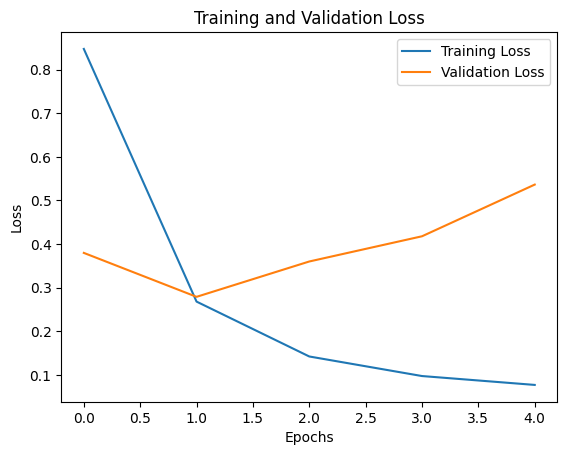

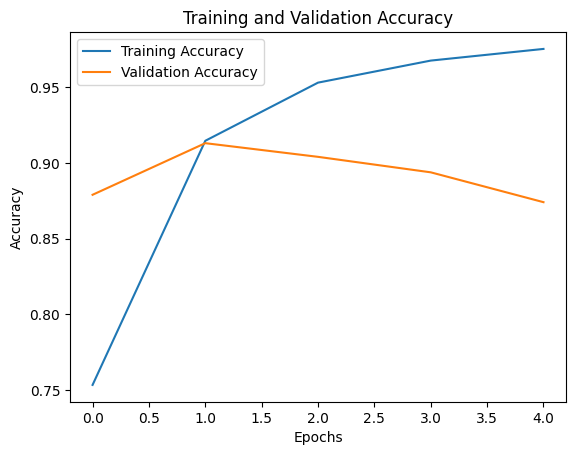

In [16]:
# prompt: Model evaluation

import matplotlib.pyplot as plt
# Evaluate the model on the test data
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
# prompt: best parameters

import numpy as np
# Find the best parameters from the training history
best_epoch = np.argmax(history.history['val_accuracy'])
best_loss = history.history['val_loss'][best_epoch]
best_accuracy = history.history['val_accuracy'][best_epoch]

# Print the best parameters
print('Best Epoch:', best_epoch)
print('Best Loss:', best_loss)
print('Best Accuracy:', best_accuracy)


Best Epoch: 1
Best Loss: 0.27904534339904785
Best Accuracy: 0.9131637215614319


In [20]:
# prompt: save the model

# Save the model to disk
model.save('plant_disease_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
1358/1358 [==============================] - 110s 80ms/step - loss: 0.8606 - accuracy: 0.7499 - val_loss: 0.3722 - val_accuracy: 0.8800
Epoch 2/2
339/339 [==============================] - 19s 57ms/step - loss: 0.3102 - accuracy: 0.9027
Test loss: 0.3101893961429596
Test accuracy: 0.9027470350265503


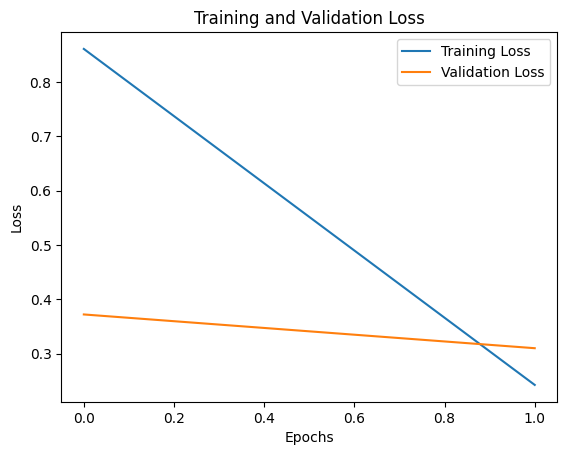

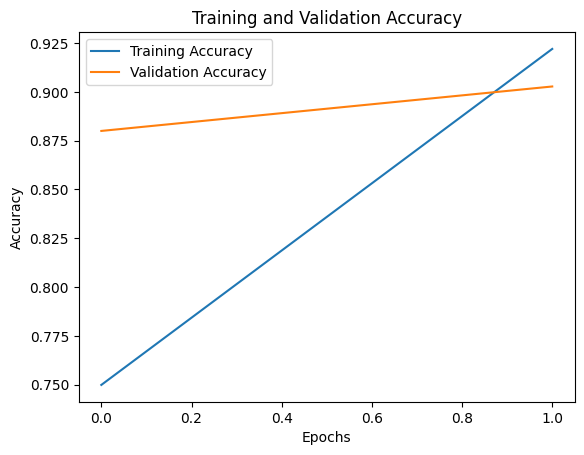

In [22]:
# prompt: Build CNN

best_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dense(38, activation='softmax')
])

# Compile the Model
best_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model
history_best = best_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=2,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

# prompt: Model evaluation

import matplotlib.pyplot as plt
# Evaluate the model on the test data
loss, accuracy = best_model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Plot the training and validation loss
plt.plot(history_best.history['loss'], label='Training Loss')
plt.plot(history_best.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history_best.history['accuracy'], label='Training Accuracy')
plt.plot(history_best.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [23]:
# prompt: save the best_model

best_model.save('best_plant_disease_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
